In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import json
%matplotlib inline

In [3]:
train_X = pd.read_csv("train_X.csv").set_index('mid')
train_X_normalized = pd.read_csv("train_X_normalized.csv").set_index('mid')
train_y = pd.read_csv('train_y.csv').set_index('mid')['radiant_win']

**(1.5 балла) Задание 7.** Постройте для разных алгоритмов графики [кривых обучения](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.learning_curve.html), изображающие зависимость качества на тестовой и обучающей выборках от количества объектов, на которых обучаются модели. Посмотрите на поведение кривых и ответьте на вопросы:
* Может ли с ростом числа объектов убывать качество на тестовой выборке? А на обучающей? Почему? _Качество на обучающей выборке почти для любого алгоритма падает, т.к. чем больше объектов, тем меньше модели удается подстраиваться под данные. На тестовой выборке качество может падать при переобучении, если данные разной природы (плохо разбили на тест и трейн)_
* Для каких целей можно использовать знание качества на обучающей части выборки? _Зависит от специфики алгоритма, но если качество на тестовой и обучающих выборках равны, значит модель близка к своему оптимальному описанию_
* Какой из алгоритмов лучше обучается на меньшем числе объектов? _Лучше всего себя показывает алгоритм sgd, уже на 2500 элементах качество теста и трейна почти равны_
* Может ли добавление новых объектов значительно повысить качество какого-то из алгоритмов или при существующем наборе данных для всех алгоритмов произошло насыщение? _Да, для алгоритмов, у которых наблюдается рост на полном объеме данных. Лучше всего новые данные скажутся на Descision Tree алгоритме_

In [4]:
from sklearn.model_selection import learning_curve

def draw(estimator, X, y, train_sizes):
    train_sizes, train_scores, test_scores = learning_curve(estimator, X, y, cv=5, n_jobs=-1, train_sizes=train_sizes, scoring='roc_auc')

    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    
    plt.rcParams["figure.figsize"]=10,5
    
    plt.grid()
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                         train_scores_mean + train_scores_std, alpha=0.1,
                         color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                         test_scores_mean + test_scores_std, alpha=0.1,
                         color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
                 label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
                 label="Cross-validation score")
    plt.legend()
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    plt.show()
    return test_scores_mean

## KNeighborsClassifier

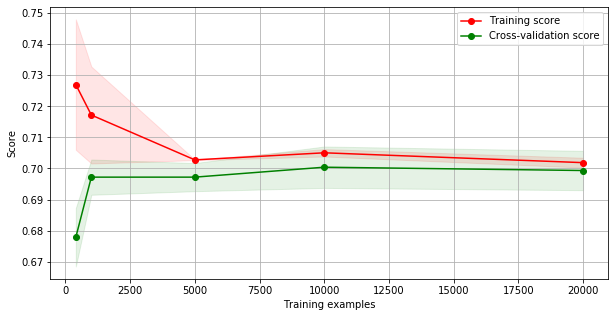

array([0.67785295, 0.69720382, 0.69720378, 0.70040332, 0.69933695])

In [35]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=305)
draw(knn, train_X, train_y, train_sizes=[400, 1000, 5000, 10000, 20000])

## DecisionTree

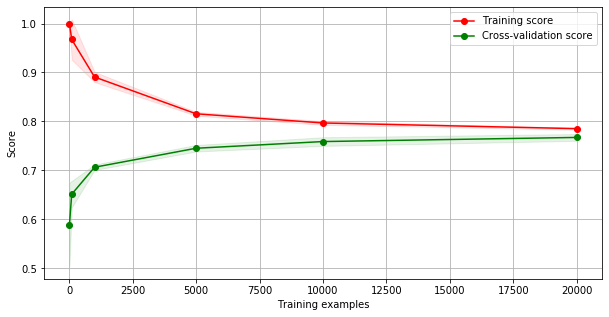

array([0.58953968, 0.65153931, 0.70654775, 0.74532547, 0.75898446,
       0.76741913])

In [5]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier(max_depth=6, criterion='entropy')
draw(dtc, train_X, train_y, train_sizes=[10, 100, 1000, 5000, 10000, 20000])

## SGD Linear Classifier

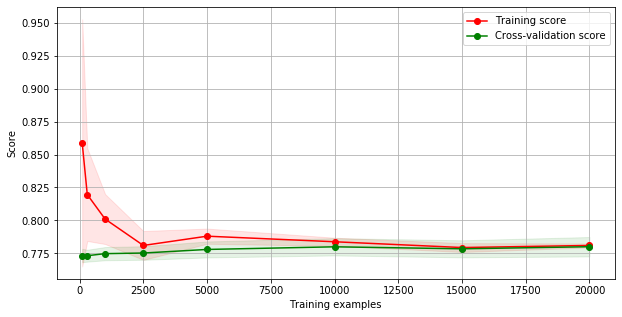

array([0.77341164, 0.77326407, 0.77482945, 0.77529889, 0.77801605,
       0.78001511, 0.77850015, 0.78007503])

In [7]:
from sklearn.linear_model import SGDClassifier

sgd = SGDClassifier(loss='squared_hinge', penalty='elasticnet')
draw(sgd, train_X, train_y, train_sizes=[100, 300, 1000, 2500, 5000, 10000, 15000, 20000])

## RandomForest

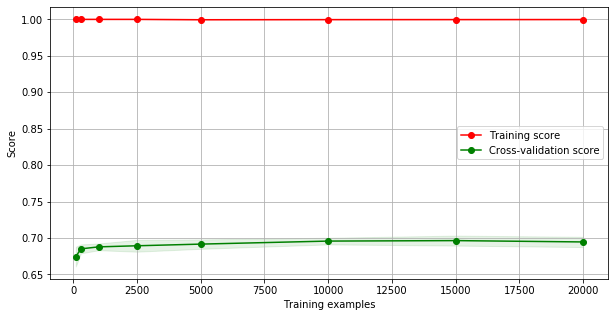

In [32]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(criterion='gini', max_features=2, n_estimators=290)
test_scores_mean = draw(rfc, train_X, train_y, train_sizes=[100, 300, 1000, 2500, 5000, 10000, 15000, 20000])

In [33]:
test_scores_mean

array([0.67446356, 0.68509125, 0.68783312, 0.6893188 , 0.69160432,
       0.69575646, 0.69640384, 0.69457527])